In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
from PIL import Image
import os

directory = "E:\IIT Year 2\Sem 1\DSGP\Images"

def convert_images_to_jpg(directory):
    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                try:
                    # Try opening the image file
                    with Image.open(file_path) as img:
                        # Save the image as jpg if not already
                        if img.format != 'JPEG':
                            new_file_path = file_path.rsplit('.', 1)[0] + '.jpg'
                            img.convert('RGB').save(new_file_path, 'JPEG')
                            os.remove(file_path)  # Optional: remove original file
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

convert_images_to_jpg(directory)

<>:4: SyntaxWarning: invalid escape sequence '\I'
<>:4: SyntaxWarning: invalid escape sequence '\I'
C:\Users\dulin\AppData\Local\Temp\ipykernel_111384\1769544289.py:4: SyntaxWarning: invalid escape sequence '\I'
  directory = "E:\IIT Year 2\Sem 1\DSGP\Images"


In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
data_path = "E:\IIT Year 2\Sem 1\DSGP\Images"

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\dulin\AppData\Local\Temp\ipykernel_111384\39687889.py:1: SyntaxWarning: invalid escape sequence '\I'
  data_path = "E:\IIT Year 2\Sem 1\DSGP\Images"


In [5]:
dataset = tf.keras.utils.image_dataset_from_directory(
    data_path,
    labels = "inferred",
    label_mode = "int",
    batch_size= 32,
    image_size = (128,128),
    shuffle = True
)

Found 3963 files belonging to 2 classes.


In [6]:
class_names = dataset.class_names

In [7]:
def split_dataset(dataset, train = 0.7, val = 0.2):
    dataset_size = len(dataset)
    training_size = int(dataset_size*train)
    validation_size = int(dataset_size*val)

    train_dataset = dataset.take(training_size)
    validation_dataset = dataset.skip(training_size).take(validation_size)
    test_dataset = dataset.skip(training_size+validation_size)

    return train_dataset, validation_dataset, test_dataset

In [8]:
train_dataset, validation_dataset, test_dataset = split_dataset(dataset)

In [9]:
for image_batch, label_batch in train_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


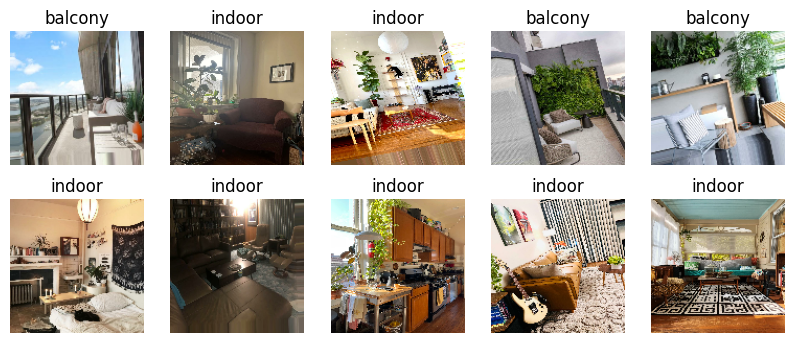

In [10]:
plt.figure(figsize=(10,4))
for image,label in train_dataset.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[[i]]])
        plt.axis('off')

In [11]:
train_dataset = train_dataset.map(lambda x,y : (x/255,y))
validation_dataset = validation_dataset.map(lambda x,y : (x/255,y))
test_dataset = test_dataset.map(lambda x,y : (x/255,y))

In [12]:
pretrained_model = tf.keras.applications.VGG16(
    include_top=False,
    input_shape = (128,128,3),
    weights='imagenet',
    pooling='max',
)

for layer in pretrained_model.layers:
    layer.trainable = False

In [13]:
model = tf.keras.models.Sequential()
model.add(pretrained_model)
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [15]:
model.fit(train_dataset, epochs=3, validation_data=validation_dataset)

Epoch 1/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 76s 851ms/step - accuracy: 0.6384 - loss: 0.6141 - val_accuracy: 0.7656 - val_loss: 0.4895
Epoch 2/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 73s 835ms/step - accuracy: 0.8172 - loss: 0.4001 - val_accuracy: 0.8359 - val_loss: 0.3628
Epoch 3/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 71s 816ms/step - accuracy: 0.8596 - loss: 0.3153 - val_accuracy: 0.8854 - val_loss: 0.2956


In [16]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]